In [6]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Wholesale customers data.csv")
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.dropna()
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
x = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = df['Channel']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(x_train, y_train)

GaussianNB()

In [15]:
with open("GB.pkl", "wb") as f:
  pickle.dump(GB, f)

In [16]:
y_pred = GB.predict(x_test)

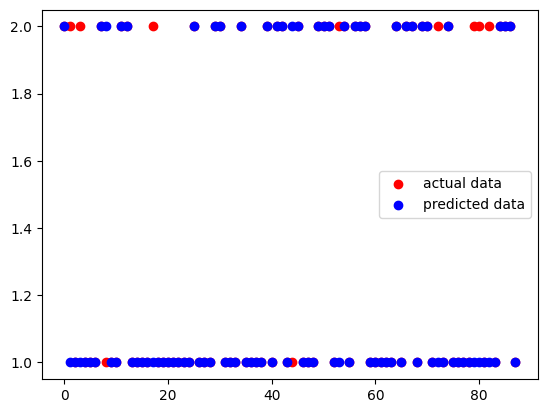

In [17]:
import matplotlib.pyplot as plt

x_axis = np.arange(len(y_test))

plt.scatter(x_axis, y_test, color="red", label="actual data")
plt.scatter(x_axis, y_pred, color="blue", label="predicted data")
plt.legend()
plt.show()